In [1]:
!pip install plotly==4.14.3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

%matplotlib inline


In [2]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
sns.set(style="whitegrid")


import warnings
import re
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('garments_worker_productivity.csv')

In [4]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [5]:
target_col = 'actual_productivity' 
df['department'] = df['department'].replace({'finishing ': 'finishing', 'sweing' : 'sewing'})
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [6]:
df.shape

(1197, 15)

In [7]:
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [8]:
df_summary = df.describe()
df_summary

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [9]:
df['wip'] = df['wip'].fillna(df['wip'].mean())
# df.drop(columns=['wip'], inplace=True)
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

In [10]:
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,Quarter1,sewing,Thursday,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725
18,2015-01-01,Quarter1,finishing,Thursday,11,0.70,4.15,1190.465991,1440,0,0.0,0,0,12.0,0.436326
17,2015-01-01,Quarter1,sewing,Thursday,4,0.65,23.69,861.000000,7200,0,0.0,0,0,60.0,0.521180
16,2015-01-01,Quarter1,finishing,Thursday,7,0.80,2.90,1190.465991,960,0,0.0,0,0,8.0,0.540729
15,2015-01-01,Quarter1,finishing,Thursday,4,0.75,3.94,1190.465991,2160,0,0.0,0,0,18.0,0.593056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174,2015-03-11,Quarter2,finishing,Wednesday,11,0.80,2.90,1190.465991,2400,0,0.0,0,0,10.0,0.874028
1173,2015-03-11,Quarter2,finishing,Wednesday,12,0.80,4.60,1190.465991,2160,0,0.0,0,0,9.0,0.922840
1195,2015-03-11,Quarter2,finishing,Wednesday,9,0.75,2.90,1190.465991,1800,0,0.0,0,0,15.0,0.505889
1183,2015-03-11,Quarter2,sewing,Wednesday,10,0.75,21.82,1674.000000,6000,34,0.0,0,0,50.0,0.750608


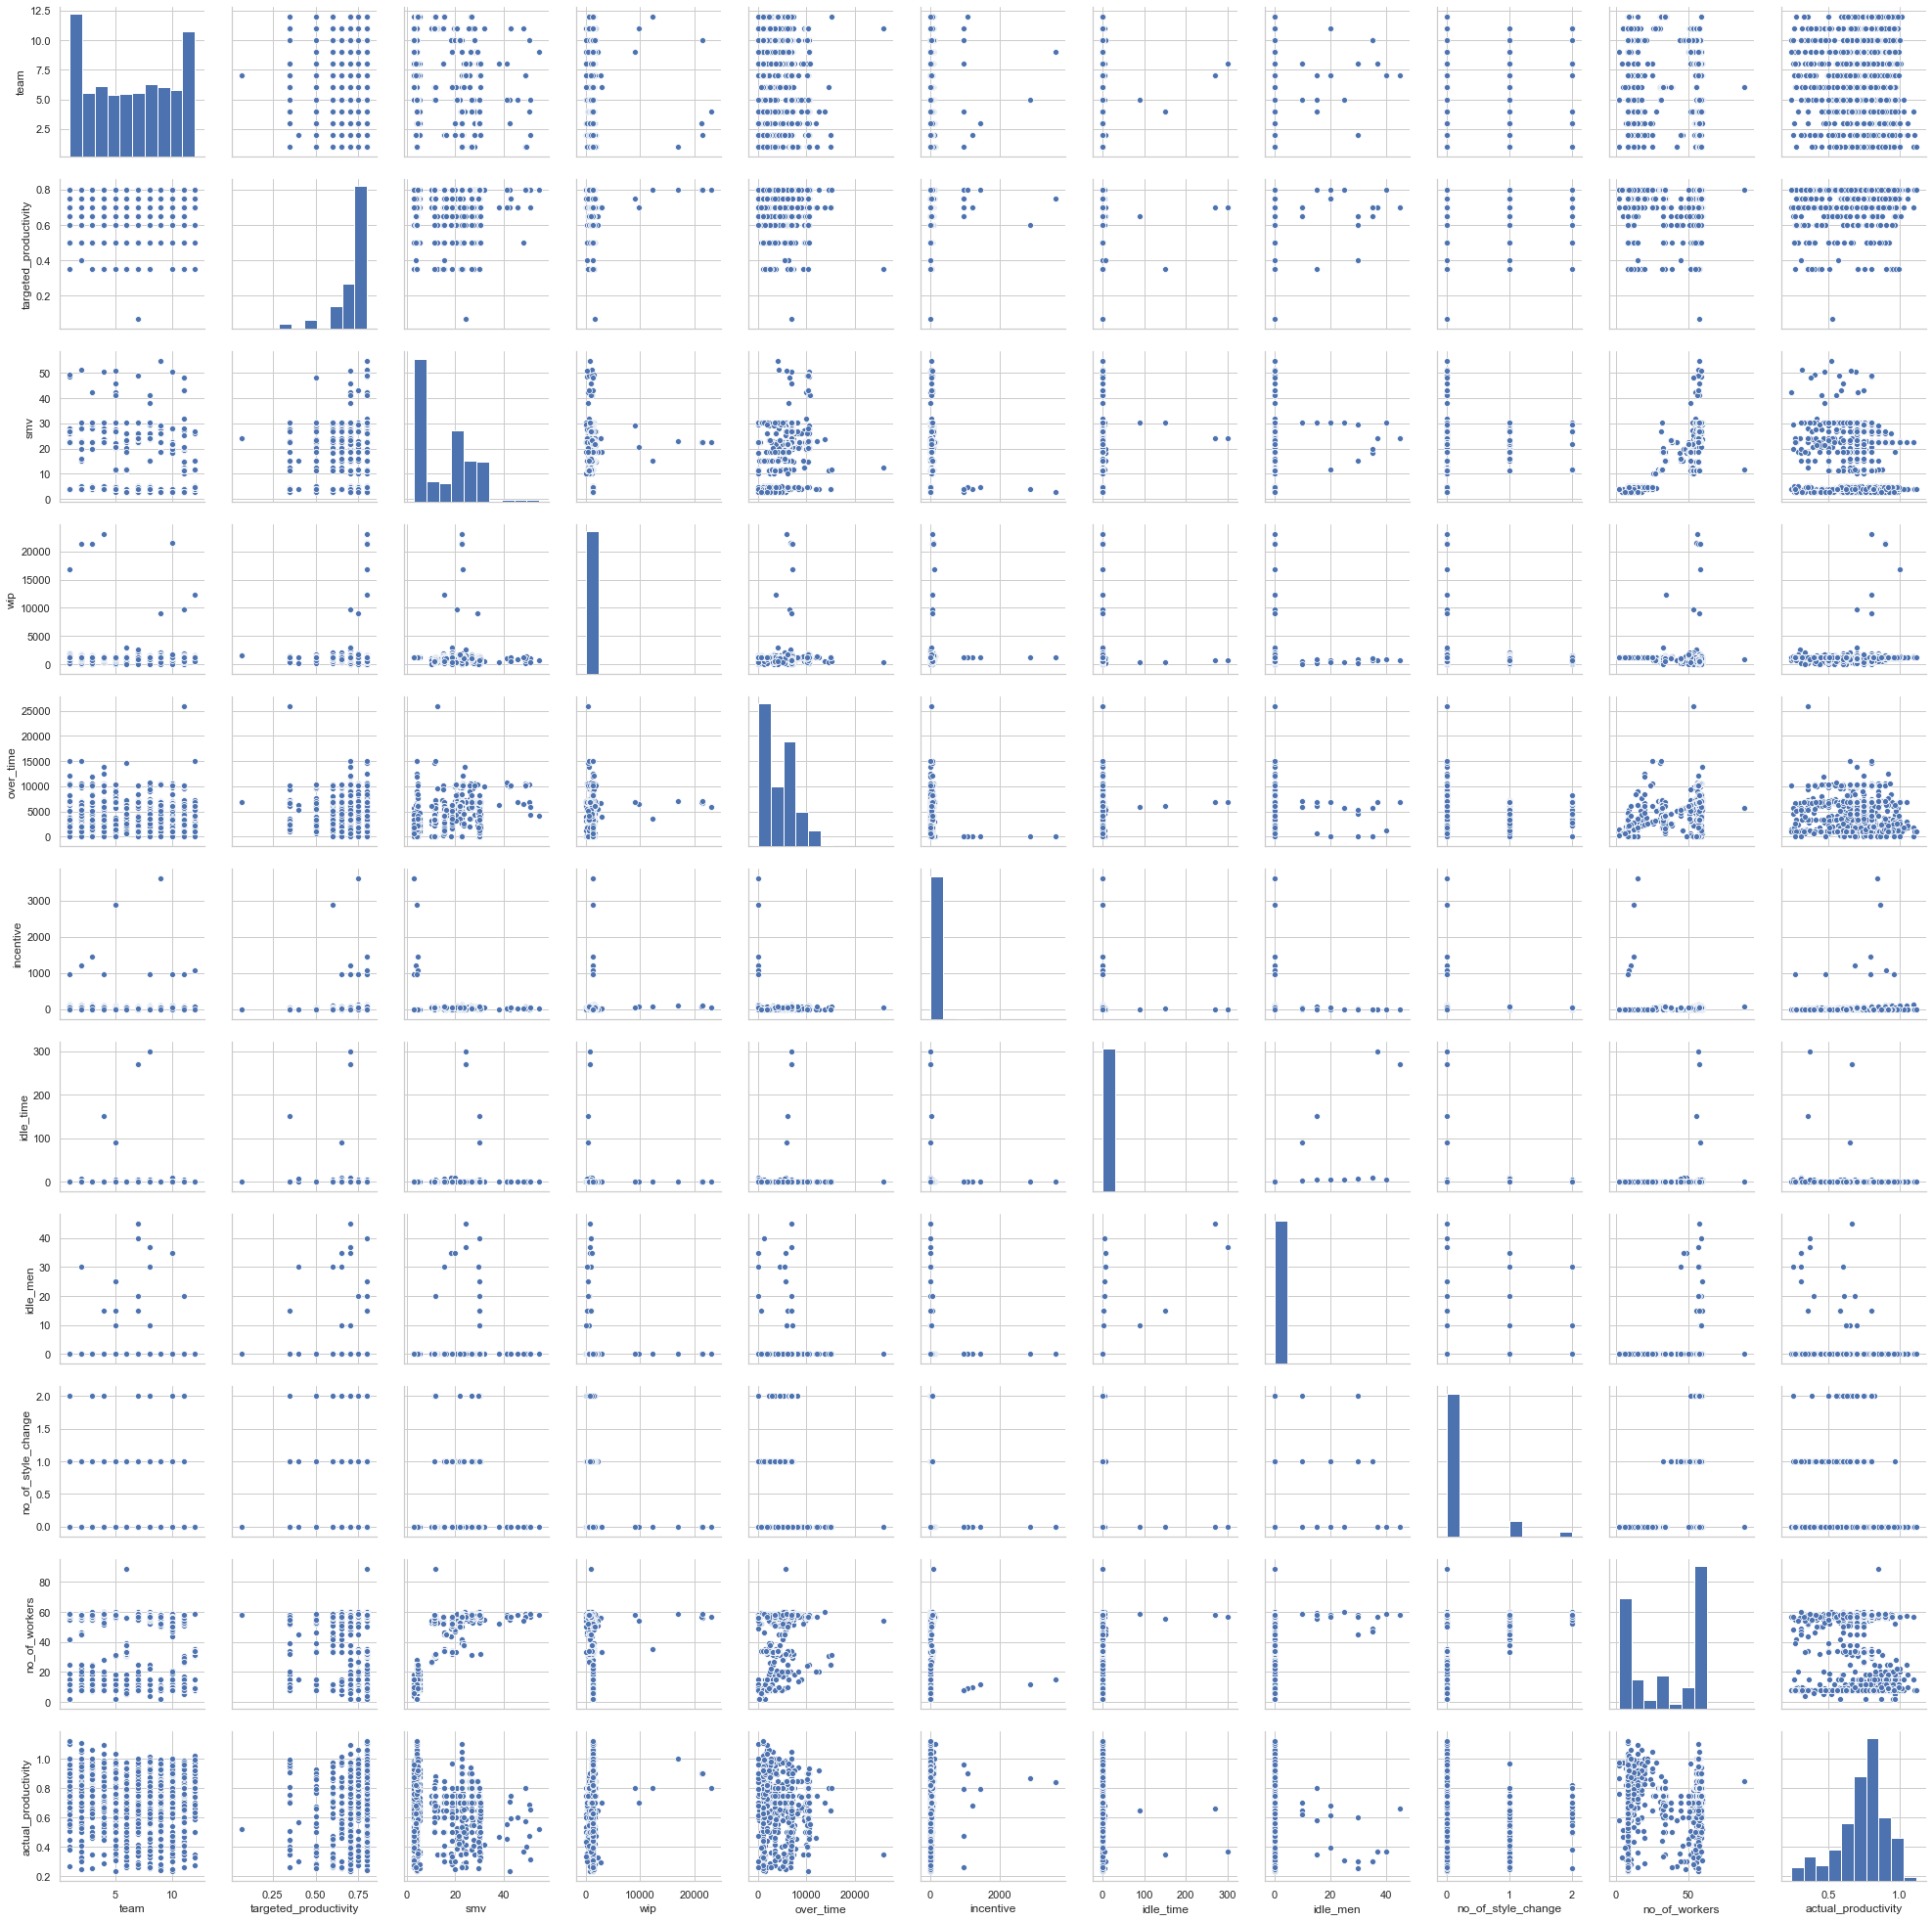

In [11]:
sns.pairplot(df)

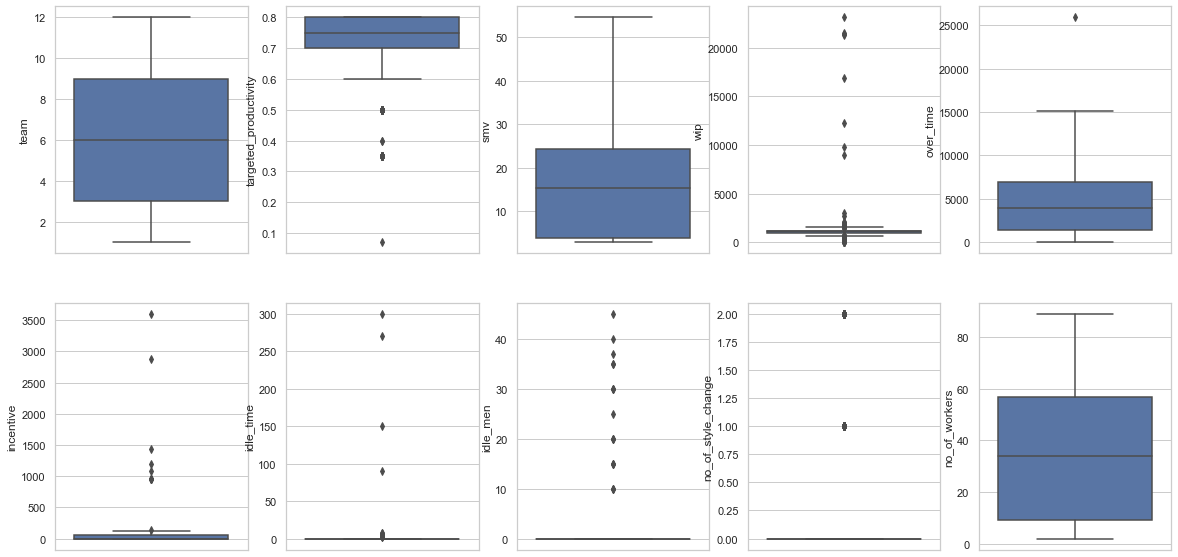

In [12]:
fig, axes = plt.subplots(2, 5, figsize = (20,10));
col_cnt = 0
col_names = ['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers']
for r in range(2):
    for c in range(5):
        try:
            sns.boxplot(df[col_names[col_cnt]], ax=axes[r][c], orient="v");
            col_cnt += 1
        except:
            pass

In [13]:
#Removing Outliers

outlier_cols = ["targeted_productivity", "wip", "idle_time", "idle_men", "no_of_style_change"] # Columns with outliers
def remove_outliers(df, col):
    q1 = df_summary[col].loc["25%"]
    q3 = df_summary[col].loc["75%"]
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df
    
for col in outlier_cols:
    df = remove_outliers(df, col)
    
df.drop(columns=["idle_time", "idle_men", "no_of_style_change"], inplace=True)

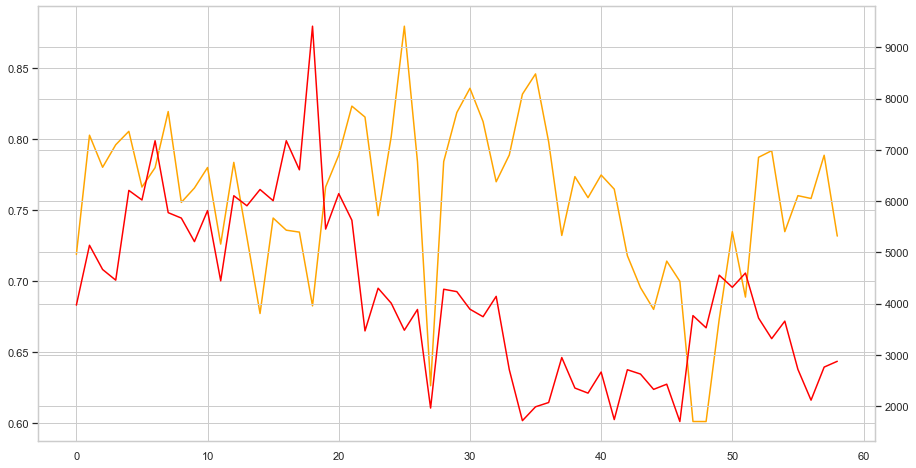

In [14]:
df_temp = pd.concat([df[['date', 'actual_productivity']].groupby('date')['actual_productivity'].mean().reset_index(), df[['date', 'over_time']].groupby('date')['over_time'].mean().reset_index().drop(columns=['date'])], axis=1)
plt.figure(figsize = (15,8))
sns.lineplot(data = df_temp.actual_productivity, color = "orange")
ax2 = plt.twinx()
sns.lineplot(data = df_temp.over_time, ax = ax2, color = "red");

In [15]:
df = pd.concat([df, pd.get_dummies(df['day'])], axis = 1) 
df = pd.concat([df, pd.get_dummies(df['department'])], axis = 1)
df.drop(columns=['quarter', 'department', 'day'], inplace=True)

In [16]:
cols = list(df.columns)
cols.remove(target_col)

In [17]:
df = df[cols + [target_col]]

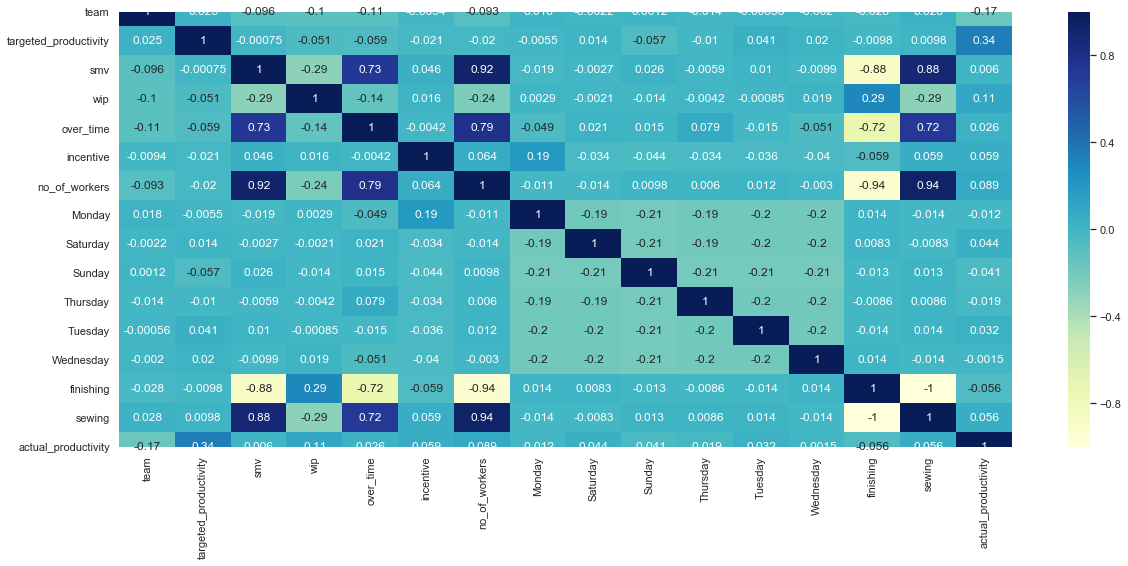

In [18]:
plt.figure(figsize = (20,8))
sns.heatmap(df.corr(), annot=True, fmt='.2g', cmap="YlGnBu");

In [19]:


df.drop(columns=['date'], inplace=True)
cols = list(df.columns)
cols.remove(target_col)



In [20]:
X = df[cols]
y = df[[target_col]].to_numpy()

Feature: team, Score: -0.00752
Feature: targeted_productivity, Score: 1.02549
Feature: smv, Score: -0.00728
Feature: wip, Score: 0.00007
Feature: over_time, Score: -0.00000
Feature: incentive, Score: 0.00005
Feature: no_of_workers, Score: 0.00458
Feature: Monday, Score: -0.00877
Feature: Saturday, Score: 0.01800
Feature: Sunday, Score: -0.00322
Feature: Thursday, Score: -0.00571
Feature: Tuesday, Score: 0.00569
Feature: Wednesday, Score: -0.00599
Feature: finishing, Score: 0.00264
Feature: sewing, Score: -0.00264


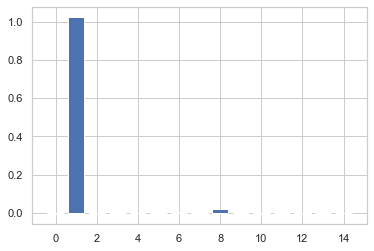

In [21]:
#Feature selection

model = linear_model.LinearRegression()
model.fit(X, y)
importance = model.coef_[0]
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (list(X.columns)[i],v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: team, Score: 0.16182
Feature: targeted_productivity, Score: 0.15381
Feature: smv, Score: 0.13753
Feature: wip, Score: 0.01073
Feature: over_time, Score: 0.15302
Feature: incentive, Score: 0.10774
Feature: no_of_workers, Score: 0.11129
Feature: Monday, Score: 0.03923
Feature: Saturday, Score: 0.02319
Feature: Sunday, Score: 0.01830
Feature: Thursday, Score: 0.03099
Feature: Tuesday, Score: 0.01285
Feature: Wednesday, Score: 0.02386
Feature: finishing, Score: 0.00284
Feature: sewing, Score: 0.01281


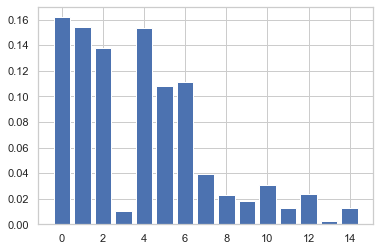

In [22]:
model = DecisionTreeRegressor()
model.fit(X, y)
importance = model.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (list(X.columns)[i],v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [23]:


comp = 2
pca = PCA(n_components=comp)
pca.fit(X)
X_pca = pca.transform(X)

print(f"Variance explained: {round(sum(pca.explained_variance_ratio_)*100, 2)}%")



Variance explained: 99.73%


In [24]:
X_pca_df = pd.DataFrame(X_pca, columns=['pca_1', 'pca_2'])

In [25]:
data_temp = pd.concat([X_pca_df, df[[target_col]]], axis=1)
fig = px.scatter_3d(data_temp, x='pca_1', y='pca_2', z=target_col, color=target_col, opacity=0.7, size_max=2)
fig.show()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_pca_df, y, test_size = 0.2, random_state = 42)

In [28]:
regr = linear_model.LinearRegression(normalize=True)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)


print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")

MSE: 0.02594282377344644
RMSE: 0.1610677614342685
MAE: 0.12449694912677788


In [29]:
pred_df = pd.concat([pd.DataFrame(y_pred), pd.DataFrame(y_test)], axis=1)
pred_df.columns = ['pred', 'actual']

pred_df['error'] = (pred_df['actual'] - pred_df['pred']) ** 2



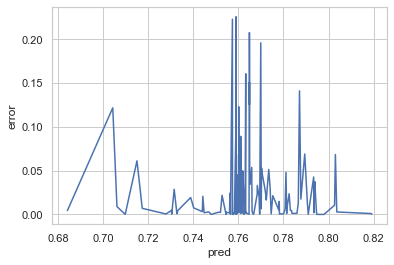

In [30]:
sns.lineplot(data=pred_df, x='pred', y='error');